In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import cv2
# Load the image
img = cv2.imread('model/test_images/maria-sharapova1.jpg')

print(img.shape)

(851, 1200, 3)


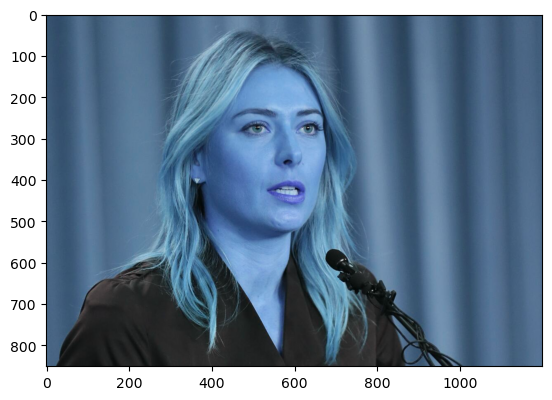

In [3]:
plt.imshow(img)

In [4]:
gray=cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
gray.shape

(851, 1200)

In [5]:
gray

array([[ 92,  92,  91, ...,  97,  96,  96],
       [ 92,  92,  91, ...,  99,  98,  98],
       [ 92,  92,  91, ..., 101, 100, 100],
       ...,
       [114, 114, 114, ..., 124, 122, 120],
       [114, 114, 114, ..., 124, 122, 120],
       [114, 114, 114, ..., 124, 122, 120]], dtype=uint8)

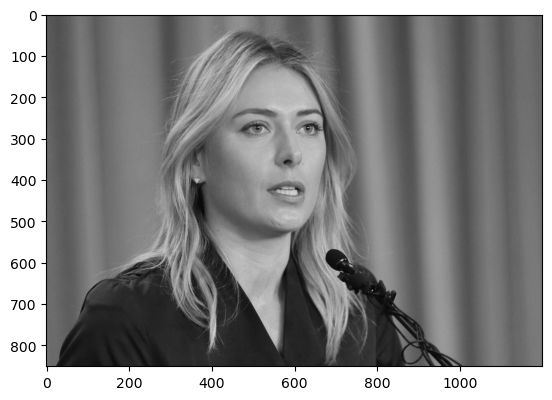

In [6]:
plt.imshow(gray , cmap='gray')

In [7]:
face_cascade=cv2.CascadeClassifier('model/opencv/haarcascade_frontalface_default.xml')
eye_cascade=cv2.CascadeClassifier('model/opencv/haarcascade_eye.xml')

faces=face_cascade.detectMultiScale(gray , 1.3 , 5)
faces


array([[424, 149, 316, 316]])

In [8]:
(x,y,w,h)=faces[0]
x,y,w,h

(424, 149, 316, 316)

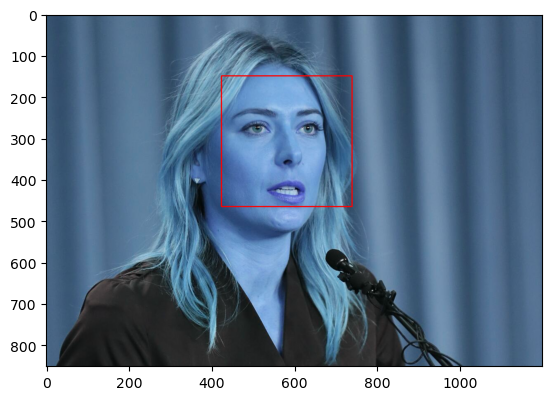

In [9]:
face_img=cv2.rectangle(img,(x,y),(x+w , y+h),(255,0,0),2)
plt.imshow(face_img)

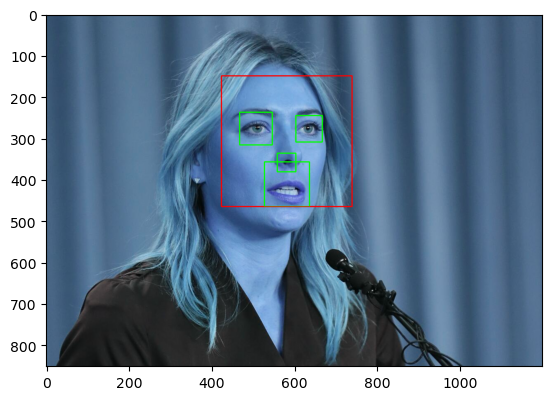

In [10]:
cv2.destroyAllWindows()
for(x,y,w,h) in faces:
    face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray=gray[y:y+h , x:x+w]
    roi_color=face_img[y:y+h , x:x+w]
    eyes=eye_cascade.detectMultiScale(roi_gray)
    for(ex , ey , ew , eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew , ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img , cmap='gray')
plt.show()

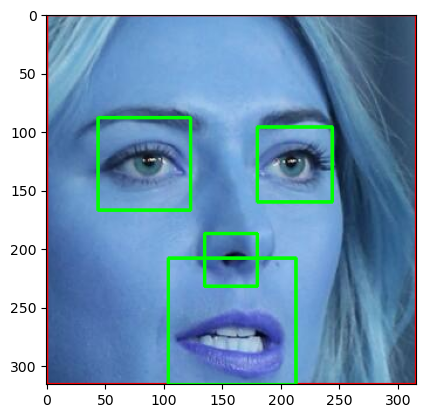

In [11]:
%matplotlib inline
plt.imshow(roi_color , cmap='gray')

In [12]:
def get_cropped_image_if_2_eyes(image_path):
    img=cv2.imread(image_path)
    gray=cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(gray , 1.3 , 5)
    for(x,y,w,h) in faces:
        roi_gray=gray[y:y+h , x:x+w]
        roi_color=img[y:y+h , x:x+w]
        eyes=eye_cascade.detectMultiScale(roi_gray)
        if len(eyes)>=2:
            return roi_color

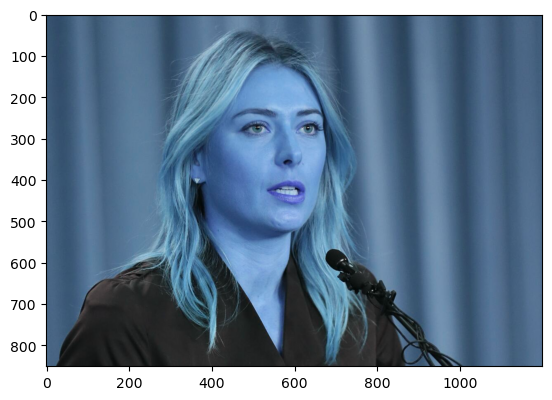

In [13]:
original_image=cv2.imread('model/test_images/maria-sharapova1.jpg')
plt.imshow(original_image)

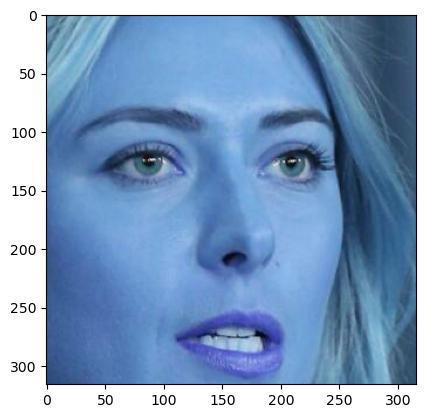

In [14]:
cropped_image=get_cropped_image_if_2_eyes('model/test_images/maria-sharapova1.jpg')
plt.imshow(cropped_image)

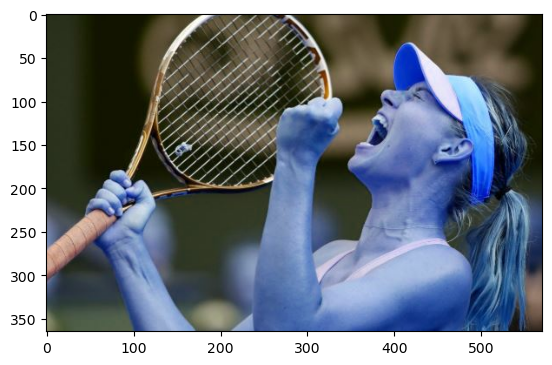

In [15]:
org_image_obstructed = cv2.imread('model/test_images/maria-sharapova2.jpg')
plt.imshow(org_image_obstructed)


In [16]:
cropped_image_no_2_eyes=get_cropped_image_if_2_eyes('model/test_images/maria-sharapova2.jpg')
cropped_image_no_2_eyes

In [17]:
path_to_data='model/dataset'
path_to_cr_data='model/dataset/cropped'

In [18]:
import os

# List to store the paths of all subdirectories
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)




In [19]:
img_dirs

['model/dataset\\.ipynb_checkpoints',
 'model/dataset\\cropped',
 'model/dataset\\lionel_messi',
 'model/dataset\\maria_sharapova',
 'model/dataset\\roger federer',
 'model/dataset\\serena_williams',
 'model/dataset\\virat_kohli']

In [20]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [21]:
import os
import cv2
import shutil

def get_cropped_image_if_2_eyes(image_path):
    try:
        img = cv2.imread(image_path)
        if img is None:
            print(f"Error: Unable to read image at {image_path}")
            return None
        
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)
        for (x, y, w, h) in faces:
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = img[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray)
            if len(eyes) >= 2:
                return roi_color
        return None
    except Exception as e:
        print(f"Error processing image at {image_path}: {e}")
        return None

# Load Haar cascades
face_cascade = cv2.CascadeClassifier('model/opencv/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('model/opencv/haarcascade_eye.xml')

# Paths
path_to_data = 'model/dataset'
path_to_cr_data = 'model/dataset/cropped'

# Remove existing cropped images directory
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

# List to store the paths of all subdirectories
img_dirs = [entry.path for entry in os.scandir(path_to_data) if entry.is_dir()]

cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    celebrity_name = os.path.basename(img_dir)
    print(f"Processing celebrity: {celebrity_name}")
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        if entry.is_file() and entry.name.lower().endswith(('.jpg', '.jpeg', '.png')):
            cropped_image = get_cropped_image_if_2_eyes(entry.path)
            if cropped_image is not None:
                cropped_folder = os.path.join(path_to_cr_data, celebrity_name)
                if not os.path.exists(cropped_folder):
                    os.makedirs(cropped_folder)
                    cropped_image_dirs.append(cropped_folder)
                    print("Generating cropped images in folder:", cropped_folder)
                
                cropped_file_name = f"{celebrity_name}_{len(celebrity_file_names_dict[celebrity_name]) + 1}.png"
                cropped_file_path = os.path.join(cropped_folder, cropped_file_name)
                
                cv2.imwrite(cropped_file_path, cropped_image)
                celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
        else:
            print(f"Ignoring non-image file: {entry.path}")


Processing celebrity: .ipynb_checkpoints
Processing celebrity: cropped
Processing celebrity: lionel_messi
Ignoring non-image file: model/dataset\lionel_messi\.ipynb_checkpoints
Generating cropped images in folder: model/dataset/cropped\lionel_messi
Processing celebrity: maria_sharapova
Generating cropped images in folder: model/dataset/cropped\maria_sharapova
Processing celebrity: roger federer
Ignoring non-image file: model/dataset\roger federer\03775a8e131301d9b53406c8f40fb10b.webp
Generating cropped images in folder: model/dataset/cropped\roger federer
Ignoring non-image file: model/dataset\roger federer\1163381732-850x560.webp
Ignoring non-image file: model/dataset\roger federer\5c6becd02628985d2a2ee2a2.jfif
Ignoring non-image file: model/dataset\roger federer\AP20028208029153-770x433.webp
Ignoring non-image file: model/dataset\roger federer\ca717e520880bf40c28015a3d33395db.jfif
Ignoring non-image file: model/dataset\roger federer\download.jfif
Ignoring non-image file: model/datase